<a href="https://colab.research.google.com/github/ahgaoh83/Complete-Python-Bootcamp/blob/master/ISTM_627_Summer_2022_Week_2_ORIGINAL_DO_NOT_EDIT_SAVE_A_COPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructor: Alfonso Berumen
#Pepperdine University
#ISTM 627 - Summer 2022

#**Setting up the initial notebook**
####Import Python packages

In [ ]:
#RERUN THIS IF YOUR CONNECTION GETS RESET

#import pandas:
import pandas as pd
#import numpy:
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#several others
import scipy
import sklearn
import os as os

#let's test out the relationships
import seaborn as sn
import matplotlib.pyplot as plt

#regression
from statsmodels.api import OLS
import statsmodels.formula.api as smf

#load some libraries
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

#take the exponential
import math

#import regression libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#import os as os
#import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Week 1

##Regression

In [ ]:
#Upload files via google colab (not a typical import process for Python)
from google.colab import files
files.upload()

Saving Advertising.csv to Advertising.csv


{'Advertising.csv': b',TV,radio,newspaper,sales\r\n1,230.1,37.8,69.2,22.1\r\n2,44.5,39.3,45.1,10.4\r\n3,17.2,45.9,69.3,9.3\r\n4,151.5,41.3,58.5,18.5\r\n5,180.8,10.8,58.4,12.9\r\n6,8.7,48.9,75,7.2\r\n7,57.5,32.8,23.5,11.8\r\n8,120.2,19.6,11.6,13.2\r\n9,8.6,2.1,1,4.8\r\n10,199.8,2.6,21.2,10.6\r\n11,66.1,5.8,24.2,8.6\r\n12,214.7,24,4,17.4\r\n13,23.8,35.1,65.9,9.2\r\n14,97.5,7.6,7.2,9.7\r\n15,204.1,32.9,46,19\r\n16,195.4,47.7,52.9,22.4\r\n17,67.8,36.6,114,12.5\r\n18,281.4,39.6,55.8,24.4\r\n19,69.2,20.5,18.3,11.3\r\n20,147.3,23.9,19.1,14.6\r\n21,218.4,27.7,53.4,18\r\n22,237.4,5.1,23.5,12.5\r\n23,13.2,15.9,49.6,5.6\r\n24,228.3,16.9,26.2,15.5\r\n25,62.3,12.6,18.3,9.7\r\n26,262.9,3.5,19.5,12\r\n27,142.9,29.3,12.6,15\r\n28,240.1,16.7,22.9,15.9\r\n29,248.8,27.1,22.9,18.9\r\n30,70.6,16,40.8,10.5\r\n31,292.9,28.3,43.2,21.4\r\n32,112.9,17.4,38.6,11.9\r\n33,97.2,1.5,30,9.6\r\n34,265.6,20,0.3,17.4\r\n35,95.7,1.4,7.4,9.5\r\n36,290.7,4.1,8.5,12.8\r\n37,266.9,43.8,5,25.4\r\n38,74.7,49.4,45.7,14.7\r\n39,

In [ ]:
#linear regression
ad_data=pd.read_csv("Advertising.csv",encoding = "utf-8") #import the data
len(ad_data)#number of records
ad_data.info()#fields
ad_data.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [ ]:
#drop first column (row number)
ad_data=ad_data.drop(['Unnamed: 0'], axis=1)

In [ ]:
ad_data.describe

<bound method NDFrame.describe of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [ ]:
#let's test out the relationships
import seaborn as sn
import matplotlib.pyplot as plt

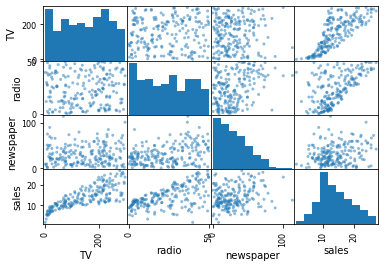

In [ ]:
pd.plotting.scatter_matrix(ad_data)
plt.show()

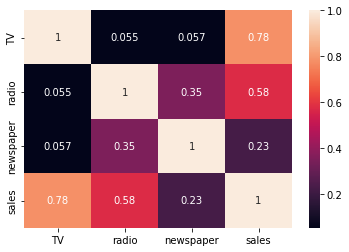

In [ ]:
#correlation matrix
corrMatrix = ad_data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#regression
from statsmodels.api import OLS
import statsmodels.formula.api as smf

In [ ]:
#model
est = smf.ols('sales ~ TV + radio + newspaper',ad_data).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
radio,0.1885,0.009,21.893,0.000,0.172,0.206
newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


In [ ]:
#get standard output
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.58e-96
Time:                        17:06:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#predicted values
#using the training data
pred = est.fittedvalues
resid = est.resid

# disable chained assignments
pd.options.mode.chained_assignment = None 

ad_data['yhat'] = pred #predicted values
ad_data['resid'] = resid #residual values

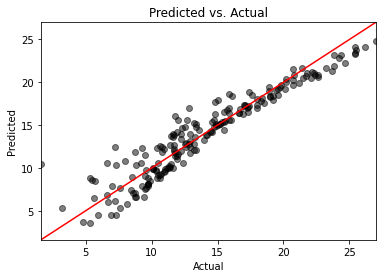

In [ ]:
#plot the actual and predicted
#plt.scatter(train['sales'],train['yhat'], marker='o')
#add a line
lineStart = ad_data.sales.min() 
lineEnd = ad_data.sales.max()
plt.figure()
plt.scatter(ad_data['sales'],ad_data['yhat'], marker='o',color = 'k', alpha=0.5)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

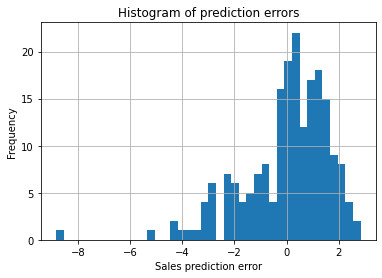

In [ ]:
#residual
residcalc = ad_data['sales'] - ad_data['yhat']
residcalc.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Sales prediction error')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#simple linear regression example
simple_all_est = smf.ols('sales ~ TV',ad_data).fit()
simple_all_est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


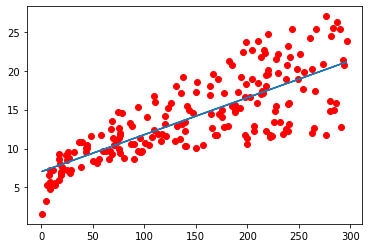

In [ ]:
#PLOT
plt.plot(ad_data['TV'],ad_data['sales'],'o',color='red')
m, b = np.polyfit(ad_data['TV'],ad_data['sales'], 1)
plt.plot(ad_data['TV'], m*ad_data['TV'] + b)
plt.show()

##Case Study: Baseball

In [ ]:
#Upload files via google colab (not a typical import process for Python)
from google.colab import files
files.upload()

Saving MLB Attendance.csv to MLB Attendance.csv


{'MLB Attendance.csv': b'\xef\xbb\xbfyear,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead\r\n2012,Baltimore Orioles,APR,6,46773,Friday,Minnesota Twins,59,Clear,Day,NO,NO,NO,NO\r\n2012,Baltimore Orioles,APR,7,31532,Saturday,Minnesota Twins,63,Clear,Night,NO,NO,NO,NO\r\n2012,Baltimore Orioles,APR,8,14738,Sunday,Minnesota Twins,68,Clear,Day,NO,NO,NO,NO\r\n2012,Baltimore Orioles,APR,9,25478,Monday,New York Yankees,65,Cloudy,Night,NO,NO,NO,NO\r\n2012,Baltimore Orioles,APR,10,24659,Tuesday,New York Yankees,62,Clear,Night,NO,NO,NO,NO\r\n2012,Baltimore Orioles,APR,11,22919,Wednesday,New York Yankees,53,Cloudy,Night,NO,NO,NO,NO\r\n2012,Baltimore Orioles,APR,24,11058,Tuesday,Toronto Blue Jays,60,Cloudy,Night,NO,NO,NO,NO\r\n2012,Baltimore Orioles,APR,25,10415,Wednesday,Toronto Blue Jays,70,Clear,Night,NO,NO,NO,NO\r\n2012,Baltimore Orioles,APR,26,13725,Thursday,Toronto Blue Jays,64,Cloudy,Night,NO,YES,NO,NO\r\n2012,Baltimore Orioles,APR,27,18297,

In [ ]:
mlb_data=pd.read_csv("MLB Attendance.csv",encoding = "utf-8") #import the data
len(mlb_data)#number of records
mlb_data.info()#fields
mlb_data.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         2421 non-null   int64 
 1   home_team    2421 non-null   object
 2   month        2421 non-null   object
 3   day          2421 non-null   int64 
 4   attend       2421 non-null   int64 
 5   day_of_week  2421 non-null   object
 6   opponent     2421 non-null   object
 7   temp         2421 non-null   int64 
 8   skies        2421 non-null   object
 9   day_night    2421 non-null   object
 10  cap          2421 non-null   object
 11  shirt        2421 non-null   object
 12  fireworks    2421 non-null   object
 13  bobblehead   2421 non-null   object
dtypes: int64(4), object(10)
memory usage: 264.9+ KB


,year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,2012,Baltimore Orioles,APR,6,46773,Friday,Minnesota Twins,59,Clear,Day,NO,NO,NO,NO
1,2012,Baltimore Orioles,APR,7,31532,Saturday,Minnesota Twins,63,Clear,Night,NO,NO,NO,NO
2,2012,Baltimore Orioles,APR,8,14738,Sunday,Minnesota Twins,68,Clear,Day,NO,NO,NO,NO
3,2012,Baltimore Orioles,APR,9,25478,Monday,New York Yankees,65,Cloudy,Night,NO,NO,NO,NO
4,2012,Baltimore Orioles,APR,10,24659,Tuesday,New York Yankees,62,Clear,Night,NO,NO,NO,NO
5,2012,Baltimore Orioles,APR,11,22919,Wednesday,New York Yankees,53,Cloudy,Night,NO,NO,NO,NO
6,2012,Baltimore Orioles,APR,24,11058,Tuesday,Toronto Blue Jays,60,Cloudy,Night,NO,NO,NO,NO
7,2012,Baltimore Orioles,APR,25,10415,Wednesday,Toronto Blue Jays,70,Clear,Night,NO,NO,NO,NO
8,2012,Baltimore Orioles,APR,26,13725,Thursday,Toronto Blue Jays,64,Cloudy,Night,NO,YES,NO,NO
9,2012,Baltimore Orioles,APR,27,18297,Friday,Oakland Athletics,60,Clear,Night,NO,NO,NO,NO


In [ ]:
#find team names and count of games
pd.crosstab(index=mlb_data['home_team'], columns='81')

col_0,81
home_team,
Arizona Diamondbacks,81
Atlanta Braves,81
Baltimore Orioles,79
Boston Red Sox,81
Chicago Cubs,81
Chicago White Sox,81
Cincinnati Reds,81
Cleveland Indians,81
Colorado Rockies,81


In [ ]:
sf_mlb_data = mlb_data[(mlb_data.home_team == "Cincinnati Reds")]

In [ ]:
sf_mlb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1453 to 1533
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         81 non-null     int64 
 1   home_team    81 non-null     object
 2   month        81 non-null     object
 3   day          81 non-null     int64 
 4   attend       81 non-null     int64 
 5   day_of_week  81 non-null     object
 6   opponent     81 non-null     object
 7   temp         81 non-null     int64 
 8   skies        81 non-null     object
 9   day_night    81 non-null     object
 10  cap          81 non-null     object
 11  shirt        81 non-null     object
 12  fireworks    81 non-null     object
 13  bobblehead   81 non-null     object
dtypes: int64(4), object(10)
memory usage: 9.5+ KB


In [ ]:
sf_mlb_data.head()

,year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
1453,2012,Cincinnati Reds,APR,5,42956,Thursday,Miami Marlins,60,Cloudy,Day,NO,NO,NO,NO
1454,2012,Cincinnati Reds,APR,7,41662,Saturday,Miami Marlins,67,Clear,Night,NO,NO,YES,NO
1455,2012,Cincinnati Reds,APR,8,23539,Sunday,Miami Marlins,61,Clear,Day,NO,NO,NO,NO
1456,2012,Cincinnati Reds,APR,9,16909,Monday,St. Louis Cardinals,64,Clear,Night,NO,NO,NO,NO
1457,2012,Cincinnati Reds,APR,10,17110,Tuesday,St. Louis Cardinals,51,Cloudy,Night,NO,NO,NO,NO


In [ ]:
sf_mlb_data['year'].unique

<bound method Series.unique of 1453    2012
1454    2012
1455    2012
1456    2012
1457    2012
        ... 
1529    2012
1530    2012
1531    2012
1532    2012
1533    2012
Name: year, Length: 81, dtype: int64>

In [ ]:
#pct filled
#Dodgers capacity = 56,000
#Giants capacity = 41,915
sf_mlb_data['pct_full'] = (sf_mlb_data['attend']/56000)*100

In [ ]:
sf_mlb_data.head()

,year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,pct_full
1453,2012,Cincinnati Reds,APR,5,42956,Thursday,Miami Marlins,60,Cloudy,Day,NO,NO,NO,NO,76.707143
1454,2012,Cincinnati Reds,APR,7,41662,Saturday,Miami Marlins,67,Clear,Night,NO,NO,YES,NO,74.396429
1455,2012,Cincinnati Reds,APR,8,23539,Sunday,Miami Marlins,61,Clear,Day,NO,NO,NO,NO,42.033929
1456,2012,Cincinnati Reds,APR,9,16909,Monday,St. Louis Cardinals,64,Clear,Night,NO,NO,NO,NO,30.194643
1457,2012,Cincinnati Reds,APR,10,17110,Tuesday,St. Louis Cardinals,51,Cloudy,Night,NO,NO,NO,NO,30.553571


([], <a list of 0 Text major ticklabel objects>)

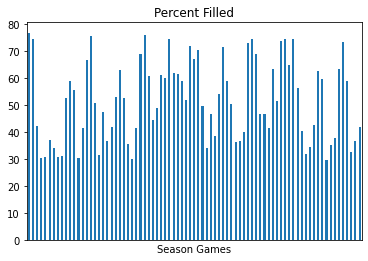

In [ ]:
sf_mlb_data['pct_full'].plot(kind="bar", title="test")
plt.title("Percent Filled")
plt.xlabel('Season Games')
plt.xticks([])

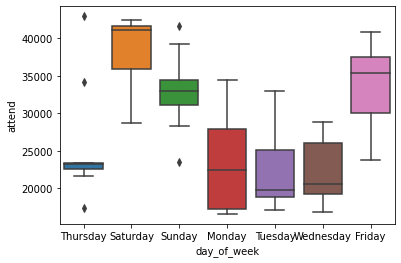

In [ ]:
#boxplot
boxplot = sn.boxplot(x="day_of_week", y="attend", data=sf_mlb_data)
boxplot

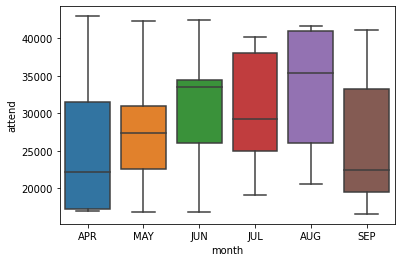

In [ ]:
boxplot = sn.boxplot(x="month", y="attend", data=sf_mlb_data)
boxplot

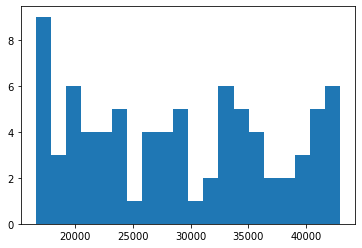

In [ ]:
#histogram
plt.hist(sf_mlb_data["attend"], bins = 20)
plt.show()

In [ ]:
#promotion counts
pd.crosstab(index=sf_mlb_data['fireworks'], columns='count')

col_0,count
fireworks,
NO,71
YES,10


In [ ]:
#model
est = smf.ols('attend ~ day_of_week + month + fireworks',sf_mlb_data).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.853e+04,2888.516,9.876,0.000,2.28e+04,3.43e+04
day_of_week[T.Monday],-7196.3452,3100.194,-2.321,0.023,-1.34e+04,-1010.004
day_of_week[T.Saturday],7392.0922,2692.954,2.745,0.008,2018.386,1.28e+04
day_of_week[T.Sunday],2125.9982,2856.293,0.744,0.459,-3573.647,7825.643
day_of_week[T.Thursday],-5524.6591,2967.783,-1.862,0.067,-1.14e+04,397.459
day_of_week[T.Tuesday],-9302.2145,2865.688,-3.246,0.002,-1.5e+04,-3583.824
day_of_week[T.Wednesday],-9278.8111,2839.720,-3.268,0.002,-1.49e+04,-3612.238
month[T.AUG],3927.9230,1892.328,2.076,0.042,151.841,7704.005
month[T.JUL],3497.2501,1983.805,1.763,0.082,-461.371,7455.871
month[T.JUN],5779.0991,1870.081,3.090,0.003,2047.411,9510.787


In [ ]:
#get standard output
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     14.44
Date:                Sun, 15 May 2022   Prob (F-statistic):           2.34e-14
Time:                        17:09:20   Log-Likelihood:                -794.71
No. Observations:                  81   AIC:                             1615.
Df Residuals:                      68   BIC:                             1647.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2.853e+04   2888.516      9.876      0.000    2.28e+04    3.43e+04
day_of_week[T.Monday]    -7196.3452   3100.194     -2.321      0.023   -1.34e+04   -1010.004
day_of_week[T.Saturday]   7392.0922   2692.954      2.745      0.008    2018.386    1.28e+04
day_of_week[T.Sunday]     2125.9982   2856.293      0.744      0.459   -3573.647    7825.643
day_of_week[T.Thursday]  -5524.6591   2967.783     -1.862      0.067   -1.14e+04     397.459
day_of_week[T.Tuesday]   -9302.2145   2865.688     -3.246      0.002    -1.5e+04   -3583.824
day_of_week[T.Wednesday] -9278.8111   2839.720     -3.268      0.002   -1.49e+04   -3612.238
month[T.AUG]              3927.9230   1892.328      2.076      0.042     151.841    7704.005
month[T.JUL]              3497.2501   1983.805      1.763      0.082    -461.371    7455.871
month[T.JUN]              5779.0991   1870.081      3.090      0.003    2047.411    9510.787
month[T.MAY]               584.4093   1974.112      0.296      0.768   -3354.870    4523.689
month[T.SEP]               633.5947   1907.947      0.332      0.741   -3173.655    4440.844
fireworks[T.YES]          3922.8738   2805.014      1.399      0.167   -1674.444    9520.192
==============================================================================
Omnibus:                       24.539   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.516
Skew:                           0.976   Prob(JB):                     7.23e-14
Kurtosis:                       6.758   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
1.566e+04

15660.0

In [ ]:
4.59e-05

4.59e-05

In [ ]:
#predicted values
#using the training data
pred = est.fittedvalues
resid = est.resid

# disable chained assignments
pd.options.mode.chained_assignment = None 

sf_mlb_data['yhat'] = pred #predicted values
sf_mlb_data['resid'] = resid #residual values

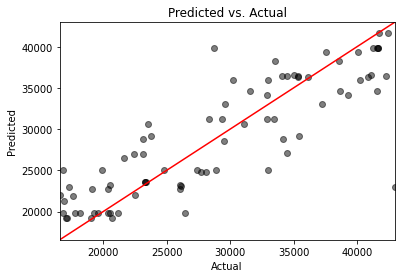

In [ ]:
#plot the actual and predicted
#add a line
lineStart = sf_mlb_data.attend.min() 
lineEnd = sf_mlb_data.attend.max()
plt.figure()
plt.scatter(sf_mlb_data['attend'],sf_mlb_data['yhat'], marker='o',color = 'k', alpha=0.5)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

##Using R in Google Colab, see:
#####https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497